In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [3]:
from data_loader import load_data
(x_train,y_train),(x_test,y_test)=load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(402, 64, 64, 3)
(402, 1)
(40, 64, 64, 3)
(40, 1)


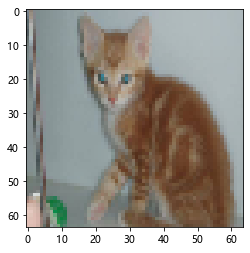

In [5]:
import matplotlib.pyplot as plt
index=27
plt.imshow(x_train[index])


In [28]:
#x_train=x_train.reshape(402,64*64*3)
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)

In [29]:
x_train.shape

(402, 12288)

In [30]:
x_train[0]

array([0.62602276, 0.60641491, 0.59106565, ..., 0.51138413, 0.46432531,
       0.36236453])

In [31]:
cat_model=Sequential()
cat_model.add(Dense(256,activation='relu',input_shape=(12288,)))
cat_model.add(Dense(128,activation='relu'))
cat_model.add(Dense(64,activation='relu'))
cat_model.add(Dense(32,activation='relu'))
cat_model.add(Dense(1,activation='sigmoid'))

In [32]:
cat_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               3145984   
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 3,189,249
Trainable params: 3,189,249
Non-trainable params: 0
_________________________________________________________________


In [33]:
cat_model.compile(optimizer=SGD(),loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
cat_model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 402 samples, validate on 40 samples
Epoch 1/20
402/402 [==============================] - 1s 3ms/step - loss: 0.6973 - acc: 0.5323 - val_loss: 0.6945 - val_acc: 0.5500
Epoch 2/20
402/402 [==============================] - 0s 945us/step - loss: 0.6896 - acc: 0.5199 - val_loss: 0.6801 - val_acc: 0.4750
Epoch 3/20
402/402 [==============================] - 0s 947us/step - loss: 0.6844 - acc: 0.5572 - val_loss: 0.6672 - val_acc: 0.6500
Epoch 4/20
402/402 [==============================] - 0s 935us/step - loss: 0.6730 - acc: 0.5721 - val_loss: 0.6589 - val_acc: 0.5500
Epoch 5/20
402/402 [==============================] - 0s 945us/step - loss: 0.6718 - acc: 0.5995 - val_loss: 0.6734 - val_acc: 0.5750
Epoch 6/20
402/402 [==============================] - 0s 958us/step - loss: 0.6598 - acc: 0.6294 - val_loss: 0.6345 - val_acc: 0.8000
Epoch 7/20
402/402 [==============================] - 0s 953us/step - loss: 0.6465 - acc: 0.6343 - val_lo

In [37]:
import numpy as np

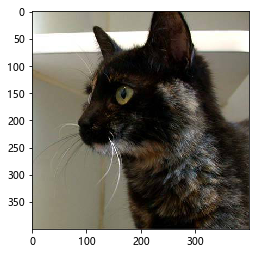

In [40]:
from skimage.transform import resize
my_image='./dataset/test1/5.jpg'
my_label_y=[1]
my_image=np.array(plt.imread(my_image))
plt.imshow(my_image)

In [42]:
num_px=64
my_image=resize(my_image,(num_px,num_px))

In [44]:
my_image.shape

(64, 64, 3)

In [50]:
my_image=my_image.reshape(1,-1)
my_image.shape

(1, 12288)

In [47]:
result=cat_model.predict(my_image)

In [48]:
result

array([[0.54454166]], dtype=float32)